# Explore simulated data

We explore the input data used to train the VAE.  

Is our artifical signal that we have added to the data obvious enough that we expect the VAE to detect it?

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.nonparametric.smoothers_lowess import lowess
import math as mt

randomState = 123
from numpy.random import seed
seed(randomState)

In [2]:
# Load data
base_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
simulation_name = "sim_AB_2775_300_v2"
data_file = os.path.join(base_dir, simulation_name, "train_model_input.txt.xz")
A_file = os.path.join(base_dir, simulation_name, "geneSetA.txt")
B_file = os.path.join(base_dir, simulation_name, "geneSetB.txt")

In [3]:
# Read data
data = pd.read_table(data_file, header=0, index_col=0, compression='xz')
data.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,0.47290,0.39666,0.25378,0.000000,0.17564,0.55439,0.41137,0.382220,0.31014,0.64252,...,0.35860,0.39005,0.457410,0.68408,0.33835,0.60832,0.64350,0.27607,0.112770,0.14517
0.1_2hr_CSV86(Pae_G1a).CEL,0.26235,0.12932,0.53978,0.439210,0.26975,0.76843,0.21250,0.062043,0.56769,0.70061,...,0.35850,0.41421,0.389880,0.47769,0.00000,0.47939,0.15447,0.14089,0.167510,0.15706
0.1_6hr_CSV86(Pae_G1a).CEL,0.47366,0.24486,0.33075,0.097697,0.38723,0.32832,0.22882,0.330040,0.31808,0.51286,...,0.18074,0.38074,0.173500,0.25157,0.18279,0.52830,0.50498,0.49978,0.061106,0.36561
0.1_7hr_CSV86(Pae_G1a).CEL,0.43927,0.51510,0.28905,0.274680,0.62898,0.55380,0.43139,0.363480,0.38572,0.14188,...,0.34684,0.15393,0.067349,0.31972,0.28244,0.49066,0.53141,0.15388,0.132330,0.26009
0.1_9hr_CSV86(Pae_G1a).CEL,0.22083,0.21829,0.65670,0.293200,0.63512,0.46289,0.48873,0.309580,0.31865,0.88787,...,0.23773,0.30194,0.070222,0.51360,0.11428,0.36026,0.38687,0.22400,0.105340,0.10209


## 1. Distribution of gene A across samples

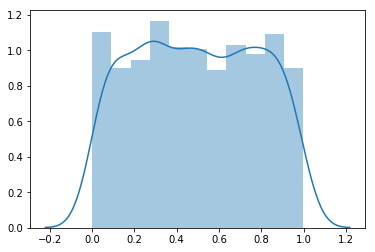

In [4]:
gene_id = 'PA3423' ## search in files for "PA" pattern
A_only = pd.DataFrame(data[gene_id], index=data.index, columns=[gene_id])
sns.distplot(A_only)

## 2. Are the genes changing linearly with respect to A?

In [5]:
# Sort samples by gene A expression (lowest --> highest)
data_sorted = data.sort_values(by=[gene_id])
data_sorted.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM199985.CEL,0.55158,0.71261,0.43911,0.70049,0.33380,0.27350,0.51373,0.54579,0.51453,0.15027,...,0.23882,0.49495,0.51462,0.45603,0.52477,0.229120,0.36525,0.50388,0.57894,0.44176
GSM2055818_7629_B-_20130705.CEL,0.79991,0.73220,0.62336,0.78003,0.55477,0.58777,0.14085,0.77815,0.73487,0.16711,...,0.30048,0.69588,0.75125,0.76361,0.73865,0.096491,0.51318,0.80264,0.83588,0.74356
GSM900179_F2_Pae_G1a_.CEL,0.46456,0.57824,0.36495,0.69899,0.13878,0.49200,0.52602,0.48042,0.46824,0.27959,...,0.25582,0.53532,0.30785,0.59512,0.87933,0.336670,0.82912,0.36639,0.48179,0.46854
GSM954579_Nomura_PA01-4_Pae_G1a_.CEL,0.60760,0.61363,0.36231,0.52805,0.36301,0.38093,0.53551,0.33346,0.32078,0.22726,...,0.47561,0.56478,0.63032,0.47337,0.36633,0.268080,0.35371,0.35100,0.34476,0.32662
GSM1133189_Weiqing_He_L-Glu-2_022410.CEL,0.93309,0.77661,0.67879,0.80977,0.68849,0.54613,0.20161,0.80443,0.83374,0.17427,...,0.45516,0.69783,0.77823,0.82269,0.77996,0.123700,0.72264,0.83849,0.80091,0.71214


In [6]:
# For each gene plot gene expression trend along A gradient
# Use pearson correlation score to compare A profile with all other genes
# Pearson correlation evaluates the linear relationship between two continuous variables
data_corr = data_sorted.corr(method='pearson')
data_corr.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
PA0001,1.000000,0.602291,0.625389,0.712740,0.618277,0.271469,-0.439088,0.630136,0.710458,-0.097703,...,0.333006,0.546863,0.745421,0.655231,0.654152,-0.572970,0.240731,0.560907,0.705783,0.661063
PA0002,0.602291,1.000000,0.665704,0.605268,0.339835,0.079028,-0.244382,0.427135,0.460510,0.074890,...,0.073767,0.449721,0.555908,0.411371,0.420241,-0.477468,0.118213,0.394574,0.573021,0.461672
PA0003,0.625389,0.665704,1.000000,0.549111,0.539232,0.377301,-0.472813,0.485236,0.584878,0.279954,...,0.385169,0.395123,0.599496,0.589256,0.432814,-0.348702,0.245278,0.473821,0.553985,0.483699
PA0004,0.712740,0.605268,0.549111,1.000000,0.473680,0.224601,-0.410620,0.597444,0.678351,-0.106846,...,0.215745,0.533391,0.580612,0.577376,0.483933,-0.452918,0.263606,0.621981,0.636986,0.496235
PA0005,0.618277,0.339835,0.539232,0.473680,1.000000,0.389522,-0.492096,0.540635,0.610655,0.002601,...,0.418211,0.518228,0.587594,0.626308,0.559321,-0.336954,0.336386,0.585320,0.582077,0.493543


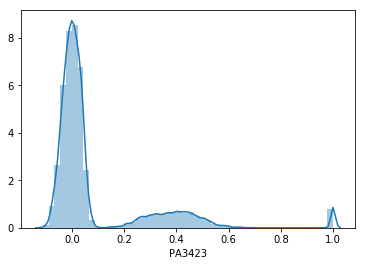

In [7]:
# Plot distribution of correlation scores
data_corr_A = data_corr[gene_id]
sns.distplot(data_corr_A)

## 3.  What does the data look like
Heatmap of genes clustered by expression pattern along gene A gradient

In [8]:
# Expect to see clustering of genes in group B that increase when gene A > 0.5
# Expect to see clustering of genes in group A with identical expression
# Keep track if gene is in group A or B
# To be fed into explore_simulated_data.py
geneSetA = pd.read_table(A_file, header=0, index_col=0)
geneSetB = pd.read_table(B_file, header=0, index_col=0)

geneSetA = geneSetA['0'].values.tolist()
geneSetB = geneSetB['0'].values.tolist()

In [9]:
# Sort samples by gene A expression (lowest --> highest)
data_sorted = data.sort_values(by=[gene_id])
data_sorted.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM199985.CEL,0.55158,0.71261,0.43911,0.70049,0.33380,0.27350,0.51373,0.54579,0.51453,0.15027,...,0.23882,0.49495,0.51462,0.45603,0.52477,0.229120,0.36525,0.50388,0.57894,0.44176
GSM2055818_7629_B-_20130705.CEL,0.79991,0.73220,0.62336,0.78003,0.55477,0.58777,0.14085,0.77815,0.73487,0.16711,...,0.30048,0.69588,0.75125,0.76361,0.73865,0.096491,0.51318,0.80264,0.83588,0.74356
GSM900179_F2_Pae_G1a_.CEL,0.46456,0.57824,0.36495,0.69899,0.13878,0.49200,0.52602,0.48042,0.46824,0.27959,...,0.25582,0.53532,0.30785,0.59512,0.87933,0.336670,0.82912,0.36639,0.48179,0.46854
GSM954579_Nomura_PA01-4_Pae_G1a_.CEL,0.60760,0.61363,0.36231,0.52805,0.36301,0.38093,0.53551,0.33346,0.32078,0.22726,...,0.47561,0.56478,0.63032,0.47337,0.36633,0.268080,0.35371,0.35100,0.34476,0.32662
GSM1133189_Weiqing_He_L-Glu-2_022410.CEL,0.93309,0.77661,0.67879,0.80977,0.68849,0.54613,0.20161,0.80443,0.83374,0.17427,...,0.45516,0.69783,0.77823,0.82269,0.77996,0.123700,0.72264,0.83849,0.80091,0.71214


In [10]:
# Add group labels per gene (group A, B, None)
genes = data.T.index

data_sorted_labeled = data_sorted.T.assign(
    gene_group=(
        list( 
            map(
                lambda x: 'A' if x in geneSetA else 'B' if x in geneSetB else 'None',
                genes
            )      
        )
    )
)
data_sorted_labeled.head()

,GSM199985.CEL,GSM2055818_7629_B-_20130705.CEL,GSM900179_F2_Pae_G1a_.CEL,GSM954579_Nomura_PA01-4_Pae_G1a_.CEL,GSM1133189_Weiqing_He_L-Glu-2_022410.CEL,GSM821495.CEL,GSM822689_wtBSM_A.CEL,GSM560759.CEL,GSM2070494_OCio-14-MutS_A_d94_cipro_2-Pae_G1a-a1.CEL,GSM1267104_HZI1970_Pae_G1a.CEL,...,GSM774150_B38-1_3.CEL,GSM854800.CEL,GSM637584.CEL,GSM546277.CEL,GSM92176.CEL,GSM774092_CF66-1973b.CEL,GSM261927.CEL,GSM1937530_50-38_B.021511_Pae_G1a_.CEL,GSM267258.CEL,gene_group
PA0001,0.55158,0.79991,0.46456,0.60760,0.93309,0.59721,0.66778,0.35822,0.99271,0.75246,...,0.92697,0.36526,0.63998,0.73506,0.76797,0.76147,0.61707,0.75381,0.57089,None
PA0002,0.71261,0.73220,0.57824,0.61363,0.77661,0.70830,0.83423,0.54226,0.72850,0.73666,...,1.00000,0.70517,0.85492,0.99100,1.00000,1.00000,1.00000,1.00000,1.00000,B
PA0003,0.43911,0.62336,0.36495,0.36231,0.67879,0.34228,0.53156,0.33884,0.67513,0.43679,...,1.00000,0.67936,0.82293,0.71729,0.69333,0.73154,0.57386,0.88431,0.55636,B
PA0004,0.70049,0.78003,0.69899,0.52805,0.80977,0.74086,0.81947,0.50941,0.87032,0.69491,...,0.83314,0.37731,0.68153,0.70007,0.59590,0.74022,0.71807,0.73971,0.62760,None
PA0005,0.33380,0.55477,0.13878,0.36301,0.68849,0.36500,0.43913,0.35598,0.51554,0.43434,...,0.71531,0.50234,0.28751,0.84136,0.46161,0.74940,0.46251,0.44986,0.25320,None


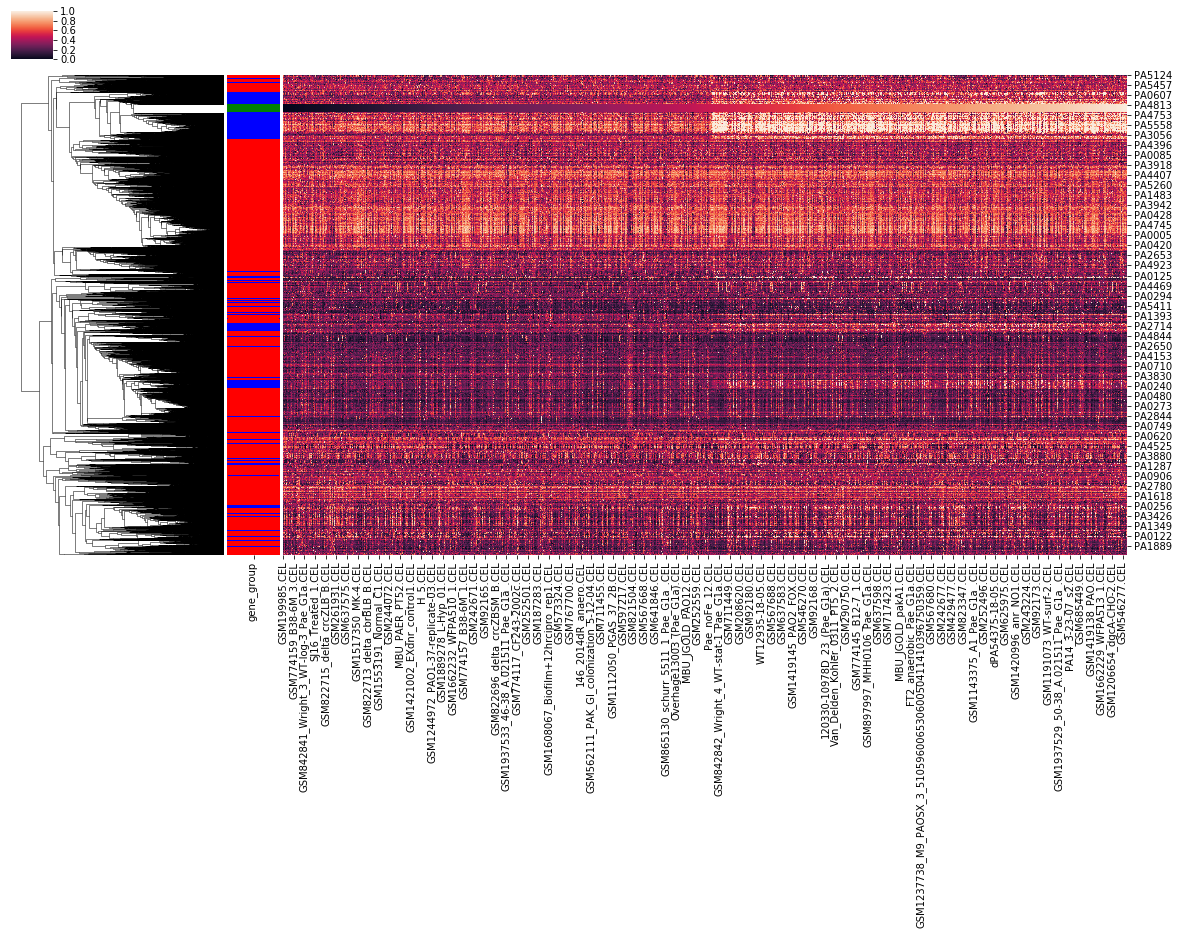

In [11]:
# Heatmap sorted by gene expression signature
# colormap: 
#     A - green
#     B - blue
#     None - red
gene_groups = data_sorted_labeled["gene_group"]
lut = dict(zip(gene_groups.unique(), "rbg"))
row_colors = gene_groups.map(lut)

sns.clustermap(data_sorted.T,
               row_cluster=True,
               col_cluster=False,
               metric="correlation",
               row_colors=row_colors,
               figsize=(20,10))

## 4.  Plot the expression of genes along the gene A gradient
Are the genes changing linearly with respect to gene A?

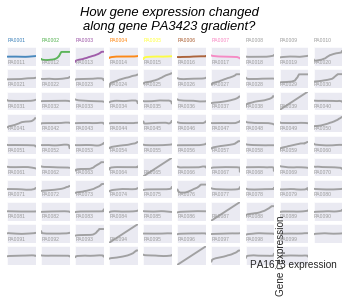

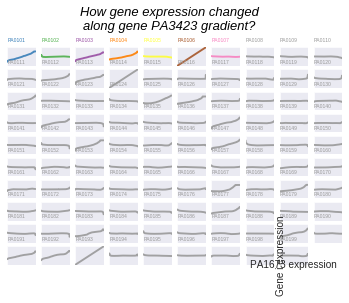

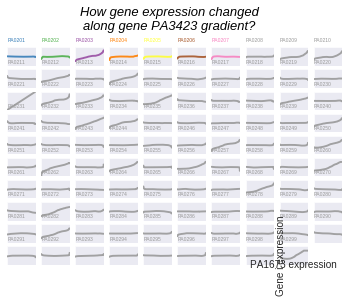

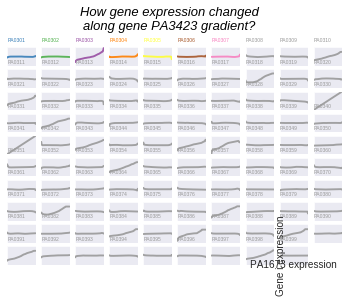

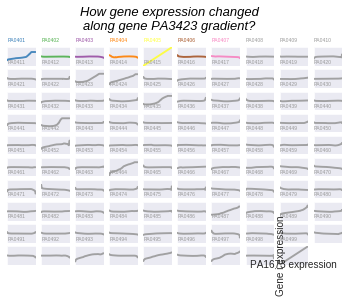

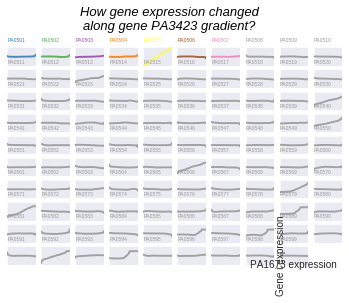

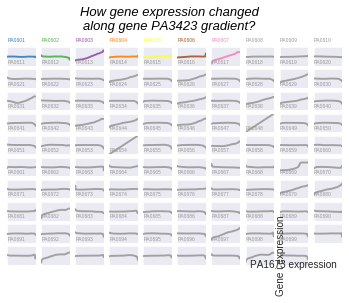

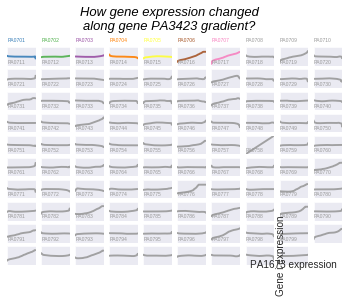

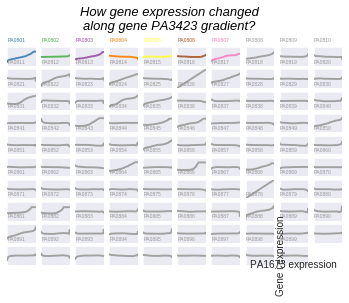

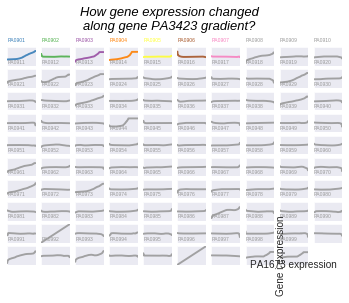

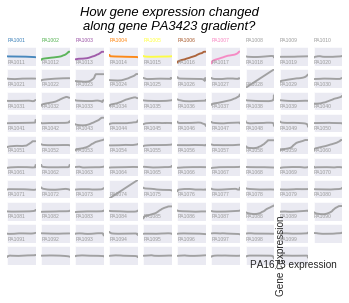

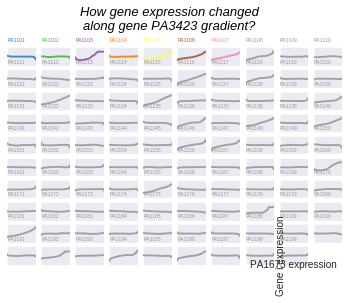

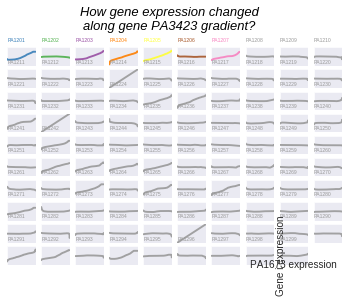

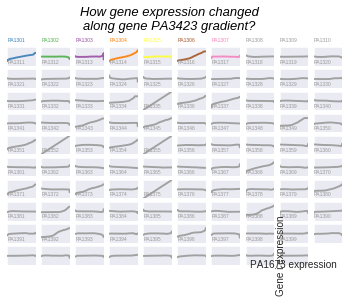

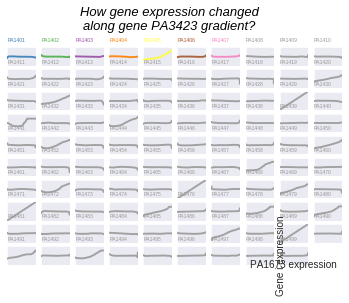

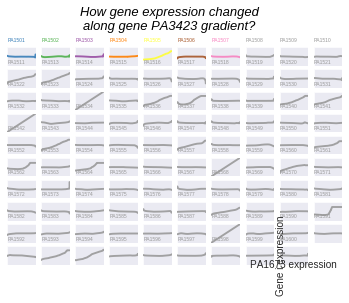

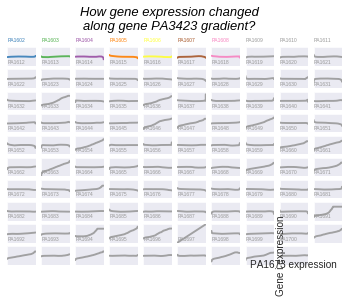

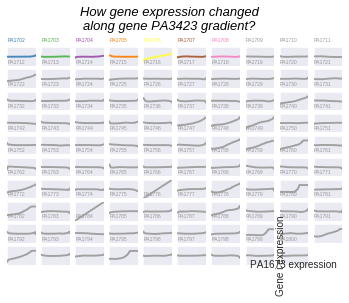

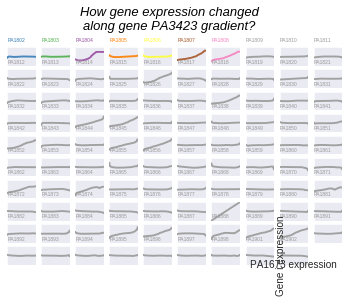

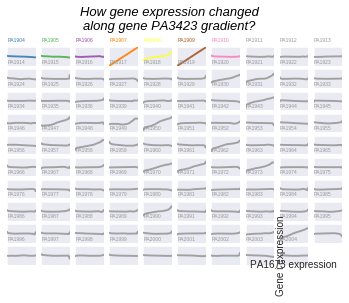

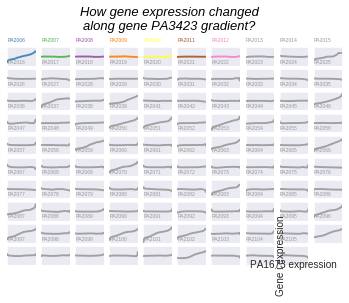

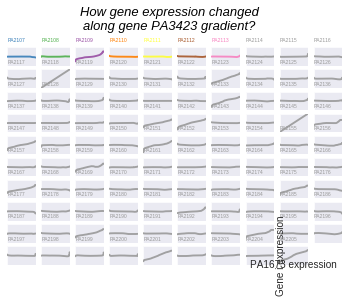

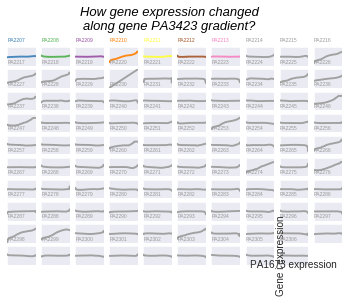

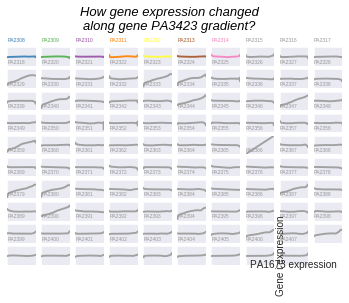

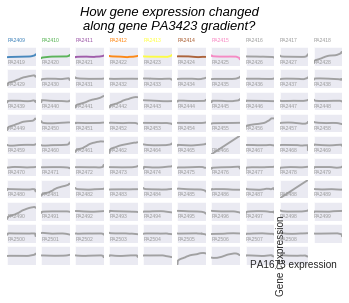

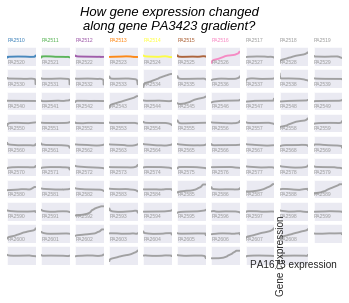

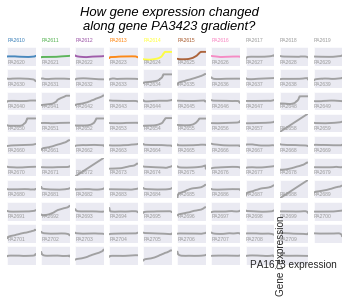

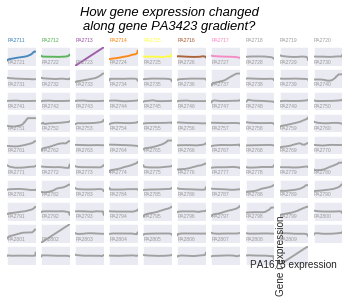

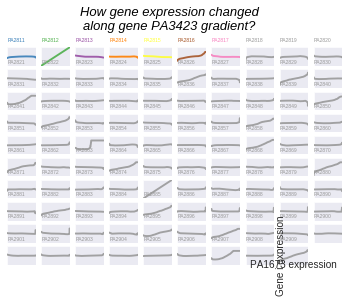

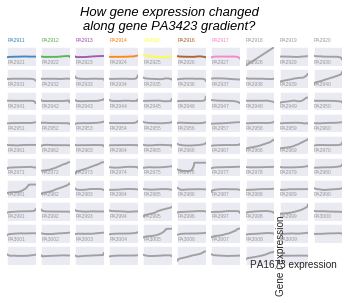

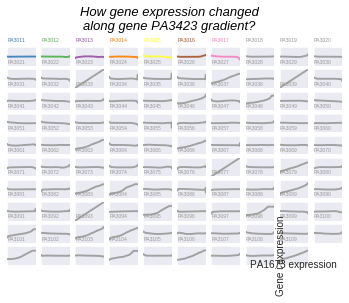

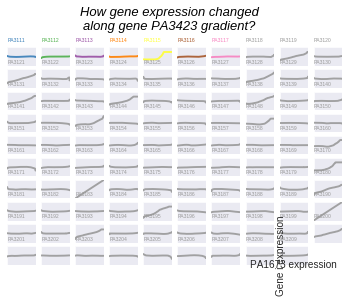

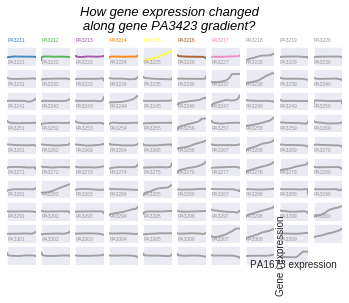

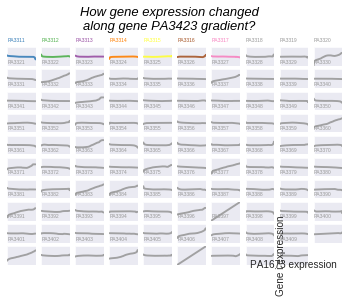

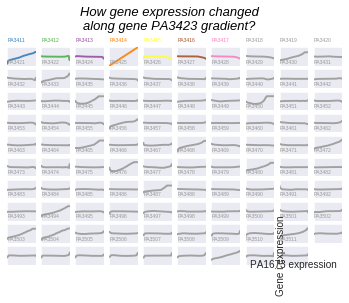

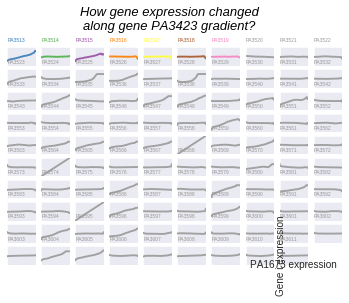

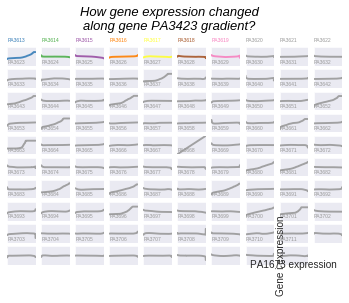

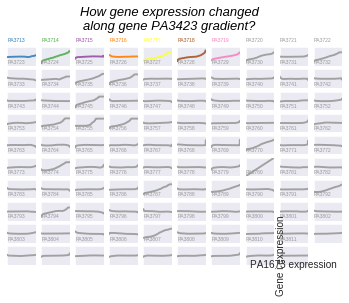

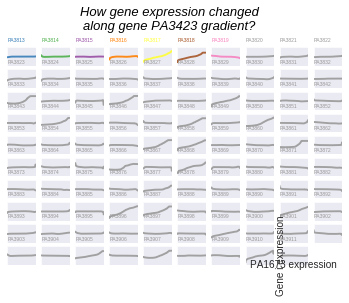

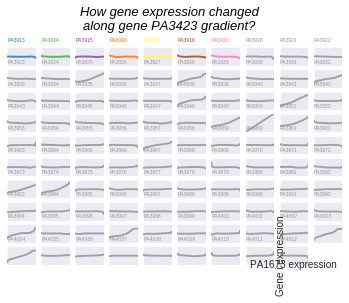

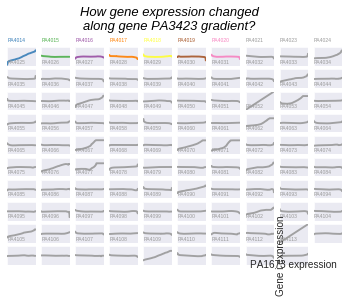

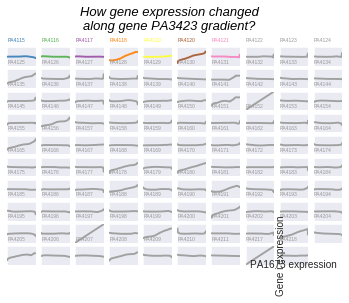

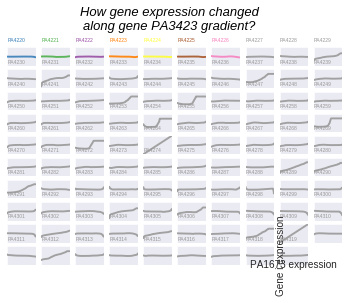

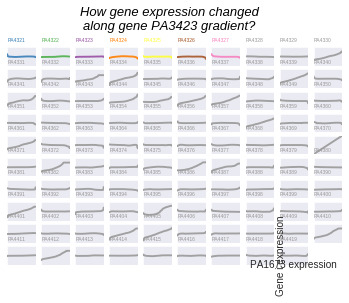

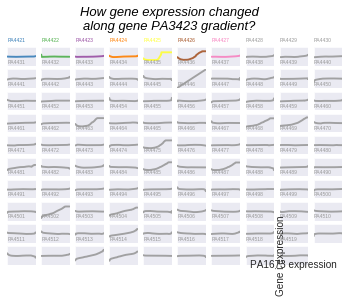

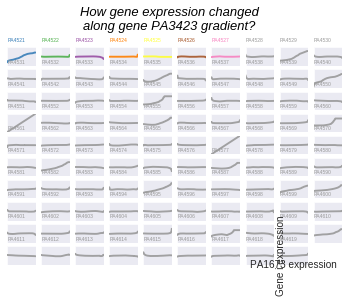

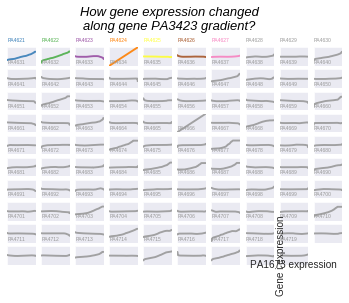

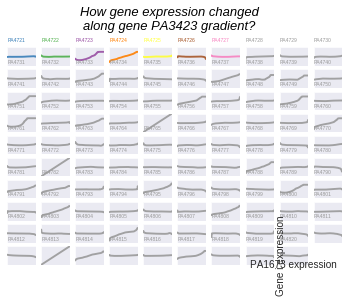

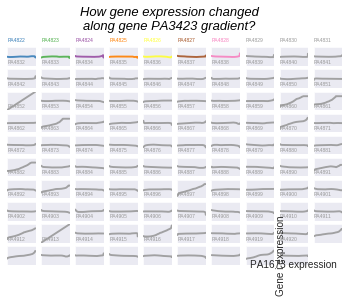

CPU times: user 17min 38s, sys: 2.38 s, total: 17min 41s
Wall time: 17min 41s


In [12]:
%%time
# Sort samples by PA1673 expression (lowest --> highest)
data_sorted = data.sort_values(by=[gene_id])
data_sorted.head()

# For each gene plot gene expression trend along Pgene A gradient

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num_genes = data_sorted.shape[1]
num_panels = 100

# Output file directory
base_dir = os.path.join(os.path.dirname(os.getcwd()), "exploration_results", simulation_name)
os.makedirs(base_dir, exist_ok=True)
    
for panel in range(mt.ceil(num_genes%num_panels)):
    rows = mt.sqrt(num_panels)
    cols = rows
    num=0
    
    # Not incrementing correctly here
    data_subsample = data_sorted.drop(gene_id, axis=1).iloc[: , (panel*num_panels):((panel+1)*num_panels)-1]
    
    for column in data_subsample:
        num+=1

        # Find the right spot on the plot
        plt.subplot(rows,cols, num)

        # Plot the lineplot --Add smoothing to see trend
        y_smooth = lowess(data_sorted[gene_id], data_subsample[column])[:,1]
        plt.plot(data_sorted[gene_id], y_smooth, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
               
        # Same limits for everybody!
        plt.xlim(0,1)
        plt.ylim(0,1)

        plt.tick_params(labelbottom='off')
        plt.tick_params(labelleft='off')
        # Not ticks everywhere
        #if num in range(7) :
        #    plt.tick_params(labelbottom='off')
        #if num not in [1,4,7] :
        #    plt.tick_params(labelleft='off')

        # Add title
        plt.title(column, loc='left', fontsize=5, fontweight=0, color=palette(num) )

    # general title
    plt.suptitle("How gene expression changed\nalong gene {} gradient?".format(gene_id), fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

    # Axis title
    plt.text(0.5, 0.02, 'PA1673 expression', ha='center', va='center')
    plt.text(0.06, 0.5, 'Gene i expression', ha='center', va='center', rotation='vertical')
    
    # Save each panel as a figure
    file_out = PdfPages(os.path.join(base_dir, 'Panel_{}.pdf'.format(panel)))
    plt.savefig(file_out, format='pdf', bbox_inches = 'tight')
    plt.show()
    file_out.close()
